In [0]:
import re
import gensim
import logging
import pandas as pd
import urllib.request
from gensim.models import word2vec

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
from google.colab import drive
drive.mount('/content/gdrive')
import os
os.chdir("/content/gdrive/My Drive/PROGA")

In [0]:
urllib.request.urlretrieve("http://rusvectores.org/static/models/rusvectores2/ruscorpora_mystem_cbow_300_2_2015.bin.gz", "ruscorpora_mystem_cbow_300_2_2015.bin.gz")
m = 'ruscorpora_mystem_cbow_300_2_2015.bin.gz'

if m.endswith('.vec.gz'):
    model = gensim.models.KeyedVectors.load_word2vec_format(m, binary=False)
elif m.endswith('.bin.gz'):
    model = gensim.models.KeyedVectors.load_word2vec_format(m, binary=True)
else:
    model = gensim.models.KeyedVectors.load(m)

In [0]:
words = ['автобус_S', 'велосипед_S', 'самолет_S']   

neighbours = []

for word in words:
    # есть ли слово в модели? 
    if word in model:
        # смотрим на вектор слова (его размерность 300, смотрим на первые 10 чисел)
        # выдаем 10 ближайших соседей слова:
        for i in model.most_similar(positive=[word], topn=5):
            # слово + коэффициент косинусной близости
            if i[1] >= 0.5:
                if i[0][-1] == 'S':
                    if i[0] not in neighbours:
                        neighbours.append(i[0])
    else:
        print('Увы, слова "%s" нет в модели!' % word)

print(neighbours)
print(len(neighbours))

for neighbour in neighbours:
   if neighbour in model:
      for i in model.most_similar(positive=[word], topn=5):
            # слово + коэффициент косинусной близости
            if i[1] >= 0.5:
                if i[0][-1] == 'S':
                    if i[0] not in neighbours:
                        neighbours.append(i[0])               

print(neighbours)
print(len(neighbours))
    
for neighbour in neighbours:
   if neighbour in model:
      print('\n')
      print(neighbour)
      print('\n')
      for i in model.most_similar(positive=[word], topn=5):
            # слово + коэффициент косинусной близости
            if i[1] >= 0.5:
                if i[0][-1] == 'S':
                    print(i[0])
                    if i[0] not in neighbours:
                        neighbours.append(i[0])               

print(neighbours)
print(len(neighbours))
    

In [16]:
words = ['автобус_S', 'велосипед_S', 'самолет_S']   

neighbours = []

for word in words:
    # есть ли слово в модели? 
    if word in model:
        # смотрим на вектор слова (его размерность 300, смотрим на первые 10 чисел)
        # выдаем 10 ближайших соседей слова:
        for i in model.most_similar(positive=[word], topn=5):
            # слово + коэффициент косинусной близости
            if i[1] >= 0.5:
                if i[0][-1] == 'S':
                    if i[0] not in neighbours:
                        neighbours.append(i[0])
    else:
        print('Увы, слова "%s" нет в модели!' % word)

for neighbour in neighbours:
    # есть ли слово в модели? 
    if neighbour in model:
        # смотрим на вектор слова (его размерность 300, смотрим на первые 10 чисел)
        # выдаем 10 ближайших соседей слова:
        for i in model.most_similar(positive=[neighbour], topn=2):                        #УВЕЛИЧИТЬ ЧИСЛО
            # слово + коэффициент косинусной близости
            if i[1] >= 0.5:
                if i[0][-1] == 'S':
                    if i[0] not in neighbours:
                        neighbours.append(i[0])
    else:
        print('Увы, слова "%s" нет в модели!' % word)


print(neighbours)
print(len(neighbours))

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


['троллейбус_S', 'трамвай_S', 'электричка_S', 'автомобиль_S', 'поезд_S', 'мотоцикл_S', 'коляска_S', 'велосипедик_S', 'санки_S', 'вертолет_S', 'аэроплан_S', 'истребитель_S', 'бомбардировщик_S', 'авиалайнер_S']
14
['троллейбус_S', 'трамвай_S', 'электричка_S', 'автомобиль_S', 'поезд_S', 'мотоцикл_S', 'коляска_S', 'велосипедик_S', 'санки_S', 'вертолет_S', 'аэроплан_S', 'истребитель_S', 'бомбардировщик_S', 'авиалайнер_S', 'автобус_S', 'машина_S', 'автомашина_S', 'велосипед_S', 'колясочка_S', 'сани_S', 'саночки_S', 'самолет_S', 'биплан_S', 'лайнер_S', 'грузовик_S', 'телега_S', 'повозка_S', 'салазки_S', 'моноплан_S', 'теплоход_S', 'фарман_S', 'ньюпор_S', 'пароход_S', 'катер_S', 'блерио_S', 'судно_S', 'корабль_S', 'шхуна_S', 'фрегат_S']
39


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


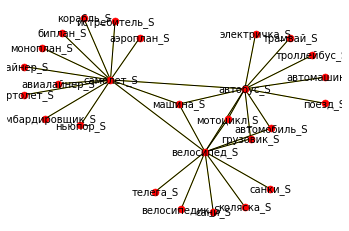

узлы ['автобус_S', 'велосипед_S', 'самолет_S', 'троллейбус_S', 'трамвай_S', 'электричка_S', 'автомобиль_S', 'поезд_S', 'мотоцикл_S', 'машина_S', 'автомашина_S', 'грузовик_S', 'коляска_S', 'велосипедик_S', 'санки_S', 'сани_S', 'телега_S', 'вертолет_S', 'аэроплан_S', 'истребитель_S', 'бомбардировщик_S', 'авиалайнер_S', 'биплан_S', 'лайнер_S', 'моноплан_S', 'ньюпор_S', 'корабль_S']
рёбра [('автобус_S', 'велосипед_S'), ('автобус_S', 'самолет_S'), ('автобус_S', 'троллейбус_S'), ('автобус_S', 'трамвай_S'), ('автобус_S', 'электричка_S'), ('автобус_S', 'автомобиль_S'), ('автобус_S', 'поезд_S'), ('автобус_S', 'мотоцикл_S'), ('автобус_S', 'автобус_S'), ('автобус_S', 'машина_S'), ('автобус_S', 'автомашина_S'), ('автобус_S', 'грузовик_S'), ('велосипед_S', 'самолет_S'), ('велосипед_S', 'автомобиль_S'), ('велосипед_S', 'мотоцикл_S'), ('велосипед_S', 'коляска_S'), ('велосипед_S', 'велосипедик_S'), ('велосипед_S', 'санки_S'), ('велосипед_S', 'машина_S'), ('велосипед_S', 'велосипед_S'), ('велосипед_S',

In [62]:
import networkx as nx
G = nx.Graph() # пустой граф
G.add_nodes_from(words) # добавляем несколько узлов сразу

nx.write_gexf(G, 'graph_file.gexf')
G1 = nx.read_gexf('graph_file.gexf')
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot') 


G.add_edges_from([(words[0],words[1]),(words[1],words[2]),(words[2],words[0])]) # сразу несколько рёбер


for word in words:
  for neighbour in neighbours:
      if model.similarity(neighbour, word) >= 0.5:
          G.add_node(neighbour)
          G.add_edge(neighbour, word)


# для начала надо выбрать способ "укладки" графа. Их много, возьмём для начала такой:
pos=nx.spring_layout(G)

nx.draw_networkx_nodes(G, pos, node_color='red', node_size=50) # рисуем узлы красным цветом, задаём размер узла
nx.draw_networkx_edges(G, pos, edge_color='yellow') # рисуем рёбра жёлтым
plt.axis('off') # по умолчанию график будет снабжён осями с координатами, здесь они бессмысленны, так что отключаем
nx.draw_networkx_nodes(G, pos, node_color='red', node_size=10) 
nx.draw_networkx_edges(G, pos, edge_color='black')
nx.draw_networkx_labels(G, pos, font_size=10, font_family='Arial')
plt.axis('off') 
plt.show()

print('узлы', G.nodes())
print('рёбра', G.edges())